In [ ]:
# LOAD A DATAFRAME

import pandas as pd

df = pd.read_csv('dataset_pca_3_components_personality.csv', sep=';')
df.head()

,PC1,PC2,PC3,Personality
0,0.425156,0.024034,0.255252,0.0
1,-0.822265,-0.213964,0.008904,1.0
2,-0.545634,-0.053308,0.213832,1.0
3,0.908568,-0.042458,0.072104,0.0
4,0.404915,0.079302,0.065595,0.0


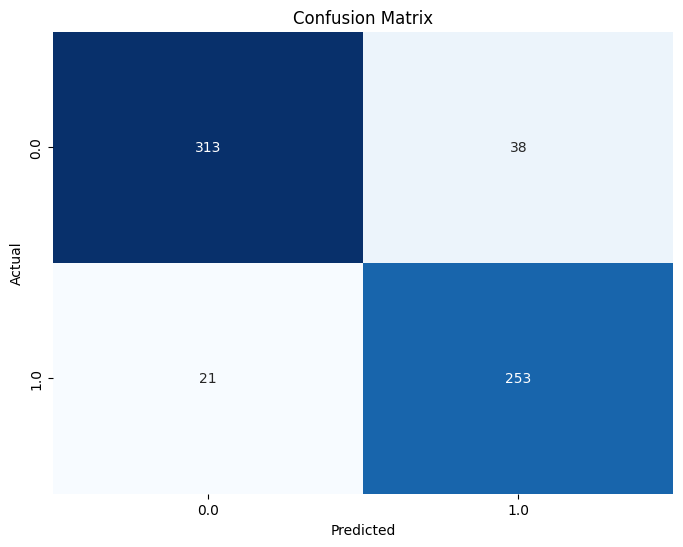

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       351
         1.0       0.87      0.92      0.90       274

    accuracy                           0.91       625
   macro avg       0.90      0.91      0.90       625
weighted avg       0.91      0.91      0.91       625



In [ ]:
# Apply the KNN algorithm where the target column is "Result"
# Generate the confusion matrix with seaborn and the corresponding f1, precision, recall reports

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Result' is the target variable and other columns are features
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the KNN classifier (you might want to tune the number of neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the classification report (includes precision, recall, f1-score)
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

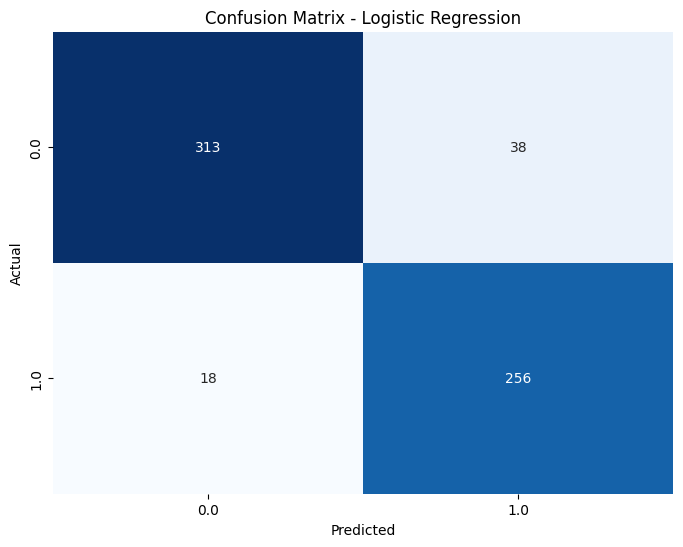

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       351
         1.0       0.87      0.93      0.90       274

    accuracy                           0.91       625
   macro avg       0.91      0.91      0.91       625
weighted avg       0.91      0.91      0.91       625



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Get the confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Get the classification report (includes precision, recall, f1-score)
report_log = classification_report(y_test, y_pred_log)

# Print the classification report
print("Classification Report - Logistic Regression:")
print(report_log)